# INFO 2950 Project

Robin Ahn, Yama Bazger, Grace Myers, and Kaylah Nicholson (ordered alphabetically by last name)

**Phase 2** 





## Research Question
### Initial Research Questions:
Which country did k-pop have the most impact on? Where are a bulk of our tourists coming from, and which countries consume the most Korean content? 

### Refined Research Question:
 ###### “Multifaceted Impact Analysis of the K-pop Cultural Phenomenon on Global Tourist Demographics and Content Consumption Patterns with Respect to South Korea.”
We have a few deep-dive research questions to answer in order to obtain the fullest analogy possible:

**Part 1**: How does the consumption pattern of Korean content (especially K-pop) compare across different countries, particularly focusing on engagement metrics like likes, views, and comments?

- How do variations in these profiles signal different engagement or consumption patterns in K-pop-related tourism activities(or purposes in visitation, such as tourism)?

**Part 2**: How does the surge in the K-pop phenomenon correlate with trends in international visitor influx to South Korea across different countries and continents?

- How have political and global events (e.g., the COVID-19 pandemic, global K-pop events, and policy changes) intersected with these trends?
How do behavioral patterns among tourists (e.g., repeat visits, duration of stay, expenditure) illustrate the impact and immersion of K-pop culture in their travel experiences?


## Section 1: Datasets on Korean Tourism, Purpose of Visit, and Gender Identity of Visitors

Firstly, we will import all the relevant libraries that will help us with our data analysis here.



In [9]:
import requests
from datetime import datetime as dt 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
import duckdb

We will now import the CSV files that we will be processing.

In [10]:
korea_purpose = pd.read_csv("/Users/robinahn/Documents/GitHub/info2950-repo/Korea_Visitors_By_Purpose-final.csv")
korea_gender = pd.read_csv("/Users/robinahn/Documents/GitHub/info2950-repo/Korea_Visitors_By_Gender-final.csv")
#world_map = gpd.read_file("/Users/yamabazger/Documents/GitHub/info2950-repo/world.geo.json")

## Why was this dataset created?

The dataset was created as a foundation for amplification of the Korean tourism market. It also lays the framework for formulating future marketing strategies, thus allowing Korea to expand and tailor the tourism experience towards more targeted individuals. 

The dataset identifies the total number of visitors that came into South Korea from 2016- 2023. It also contains the purpose of visit(tourism, business, education, etc.), mode of transportation, gender, and whether the visitors were flight attendants or not(to differentiate from “real” visitors to flight attendants). 


## Who funded the creation of this dataset?

The Korean government has a separate entity called “Visit Korea Datalab” uber-focused on the research of Korean tourism. They funded the creation of the dataset by surveying visitors to Korea and integrating pre-existing datasets from “UNWTO World Tourism Barometer.” 


## What processes might have influenced what data was observed and recorded and what was not?

From a social perspective, we believe occurrences of specific events such as K-pop concerts or fan meetups could have caused major spikes in the boost of visitors on certain dates, which might lead to a temporary skewing of our dataset. We plan to perform qualitative analysis to identify which major events took place and compare it with the data we grab from our dataset. 

From a data collection perspective, the survey design(what questions were asked, what order were they displayed in, and pre-written options) could have the biggest impact on what data was recorded. Another consideration would be who exactly was surveyed. We noticed this as we inspected that certain visitors were recorded as coming in from an “unidentified country,” as their citizenship was questionable. The timing of when they recorded the data could also have a big impact on showing results. In our case we decided to focus on a dataset that contained data before, during, and after the “k-pop boom” to properly identify the uptick in visitors and to identify which country was influenced the most by Korean culture. 


The original CSV files contained white spaces in some columns with string types. We will strip the white spaces for consistency and to have a more polished sets of data to work with.

In [11]:
#Stripping whitespaces for columns 'Continents', 'Country', and 'Purpose'
#for korea_purpose
korea_purpose['Continents'] = korea_purpose['Continents'].str.strip()
korea_purpose['Country'] = korea_purpose['Country'].str.strip()
korea_purpose['Purpose'] = korea_purpose['Purpose'].str.strip()

#Stripping whitespaces for columns 'Continents', 'Country', and 'Gender'
#for korea_gender
korea_gender['Continents'] = korea_gender['Continents'].str.strip()
korea_gender['Country'] = korea_gender['Country'].str.strip()
korea_gender['Gender'] = korea_gender['Gender'].str.strip()

We will check the initial shape of korea_purpose.

In [12]:
korea_purpose.shape

(37542, 7)

In [13]:
country_mapping = {
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'vietnam': 'Vietnam',
    'brazil': 'Brazil',
    'malaysia': 'Malaysia',
    # Add more mappings as needed
}

# Standardize country names in the 'korea_purpose' dataframe
korea_purpose['Country'] = korea_purpose['Country'].replace(country_mapping)

In [14]:
country_mapping_gender = {
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'vietnam': 'Vietnam',
    'Swiss': 'Switzerland',
    'malaysia': 'Malaysia',
    'Republic of South Africa': 'South Africa'
    # Add more mappings as needed
}

# Standardize country names in the 'korea_gender' dataframe
korea_gender['Country'] = korea_gender['Country'].replace(country_mapping_gender)

We will do some initially cleaning of the data, such as removing rows that contain terms "etc".... under Country. 

In [15]:
# Define the conditions for each column using index locations
condition_date = (korea_purpose.iloc[:, 0] == 'sum')  
condition_continent = korea_purpose.iloc[:, 1].isin\
(['Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 1 for 'Continent'
condition_country_name = korea_purpose.iloc[:, 2].isin\
(['Entire continent', 'year', 'Year and Continent', 'etc', 'Korean'])  # Using index 2 for 'Country name'
condition_purpose = korea_purpose.iloc[:, 3].isin(['entire'])

#Rows marked for deletion
rows_to_remove = korea_purpose[condition_date | condition_continent | \
                               condition_country_name | condition_purpose].index

#Now the actual deletion
korea_purpose = korea_purpose.drop(rows_to_remove)

## Observations (rows) and Attributes (columns)

**Columns**: 
- **Number of visitors**: recorded every month from 2016-2023
- **Continent**: displayed in order of continent-country
- **Country**: countries that visited South Korea from 2016~2023. We excluded "hard to pinpoint" groupings such as GCC, Oceania, African countries(they simply had the continent name and didn't elaborate on which exact country within Africa)
- **Percentage increase in # of visitors**: percentage increase in visitors from previous month
- **Purpose of visit**: divided into business trips, international affairs, tourism, immigration, etc. 
- **Gender of visitor**: only male and female. no third gender was recorded. 
- **Mode of transportation in visiting**: plane, boat, train, etc.

**Rows**: country name, continent name, specific purpose of visit(tourism, education, business, global affairs, miscellaneous), gender(male, female)


## What preprocessing was done?
- removed rows that refer to “Koreans living abroad” so we can only identify visitors of non-Korean ethnicities

- Data was originally written in Korean,  so we translated the information to English by converting it into a microsoft excel sheet and dropping it into google translate; sorting it into columns such as # of visitors to Korea, percentage increase of visitors, gender identity, etc. 

- We had a lot of GCC values for Asian countries. The countries were not specified initially and were simply named GCC. We thought it was a NaaN value until we performed research and discovered that they stood for Bahrain, Kuwait, Oman, Qatar, Saudi Arabia, and the United Arab Emirates. 

- We downloaded multiple datasets on the gender of visitors, the purpose of visitors, and the age of visitors from the same website. We decided to merge them while keeping overlapping information intact.

- We removed any rows that had the values “etc” or “miscellaneous” on the continent & country rows because they simply fogged up the dataset and we couldn’t figure out what countries/ continents they represented. 

- We also had rows that said “sum” as they stood for the total summation of all visitors from 2016-2023, which we deleted as it was not applicable and provided us with ridiculously high values. 

- We deleted entire rows if the column purpose contained the word “entire,” since it was too broad of a purpose and we wanted to identify the individual, accurate purpose of the visit.  


## If people are involved, were they aware of the data collection and if so, what purpose do they expect the data to be used for?

- We found a note on the dataset that mentioned Korea has been collecting tourism data from incoming foreign nationals since 1995. This shows it’s plausible that those working in the travel/leisure industry may be well-aware of said data collection efforts. Some of the data is derived from formal processes such as immigration and departures, where data collection is most likely expected and anticipated. 

- Incoming visitors to South Korea should expect the data to be used for obtaining general trends and insights into the Korean tourism industry. They can also expect the data to be utilized for economic analyses- as researchers attempt to observe the economic impacts and dependencies related to tourism. It could also be integrated into marketing and strategic planning to boost Korea’s appeal as a tourism destination. 


Now that we have deleted some. unknown number of rows, we will check the shape of korea_purpose to ensure the number of rows has decreased.

In [16]:
korea_purpose.shape

(24380, 7)

In korea_purpose, the Growth column had datapoints that contains "_". The underscore in the original dataset in Korean is actually a comma (e.g. "2_550.0" is really "2,550.0"). Either way, this inteferes with our data processing as we want the column data type to be a float. 



In [17]:
korea_purpose['Growth'].dtype 

dtype('O')

Here, we will fix this by first changing every element under Growth to a string, and then, we will replace the underscore with a comma. 

In [18]:

# Replace underscores with a blank ""
korea_purpose['Growth'] = korea_purpose['Growth']\
.astype(str).str.replace('_', '')

# Convert the column back to float type
korea_purpose['Growth'] = korea_purpose['Growth']\
.astype(float)


To confirm the change has been made, we check the datatype of the Growth column again.

In [19]:
korea_purpose['Growth'].dtype

dtype('float64')

In [20]:
korea_gender.head()

,Date,Continents,Country,Gender,Visitors,Visitors Same Period Previous Year,Growth
0,201601,Oceania,Australia,male,5295,5402,-2.0
1,201601,Oceania,Australia,female,4414,4379,0.8
2,201601,Oceania,Australia,Stewardess,271,216,25.5
3,201601,Oceania,Australia,entire,9980,9997,-0.2
4,201602,Oceania,Australia,male,4239,3972,6.7


We will repeat the same process with korea_gender.

In [21]:
korea_gender.shape

(25024, 7)

We change the date format for both dataframes to facilitate easier data processing 

In [22]:
korea_purpose['Date'] = pd.to_datetime(korea_purpose['Date'], \
                                       format='%Y%m')
korea_gender['Date'] = pd.to_datetime(korea_gender['Date'], \
                                      format='%Y%m')

Let's see if the change has been made to Date column.

In [23]:
korea_purpose.head()

,Date,Continents,Country,Purpose,Visitors,Visitors Same Period Previous Year,Growth
12,2016-01-01,Asia,China,tourism,456636.0,327225.0,39.5
13,2016-01-01,Asia,China,commercial,3723.0,4310.0,-13.6
14,2016-01-01,Asia,China,Public,140.0,165.0,-15.2
15,2016-01-01,Asia,China,Study Abroad,4383.0,3778.0,16.0
16,2016-01-01,Asia,China,etc,57099.0,58867.0,-3.0


In [24]:
# We define the conditions for each column using index locations
condition_date = (korea_gender.iloc[:, 0] == 'sum')  # Using index 0 for 'Base date'
condition_continent = korea_gender.iloc[:, 1].isin(['Entire continent', \
                                                    'year', 'Year and Continent', 'etc', 'Korean']) 
                                                    # Using index 1 for 'Continent'
condition_country_name = korea_gender.iloc[:, 2].isin(['Entire continent', 'year', \
                                                       'Year and Continent', 'etc', 'Korean'])  
                                                    # Using index 2 for 'Country name'
condition_purpose = korea_gender.iloc[:, 3].isin(['Stewardess', 'entire'])

#Rows marked for deletion
rows_to_remove = korea_gender[condition_date | condition_continent | \
                              condition_country_name | condition_purpose].index

#Now the actual deletion
korea_gender = korea_gender.drop(rows_to_remove)

In [25]:
korea_gender.shape

(9752, 7)

In [26]:
korea_gender.head(-3)

,Date,Continents,Country,Gender,Visitors,Visitors Same Period Previous Year,Growth
0,2016-01-01,Oceania,Australia,male,5295,5402,-2.0
1,2016-01-01,Oceania,Australia,female,4414,4379,0.8
4,2016-02-01,Oceania,Australia,male,4239,3972,6.7
5,2016-02-01,Oceania,Australia,female,2807,2785,0.8
8,2016-03-01,Oceania,Australia,male,7022,5728,22.6
...,...,...,...,...,...,...,...
25008,2023-05-01,Europe,Finland,male,486,170,185.9
25009,2023-05-01,Europe,Finland,female,479,91,426.4
25012,2023-06-01,Europe,Finland,male,418,205,103.9
25013,2023-06-01,Europe,Finland,female,425,166,156.0


We change the date format for both dataframes to facilitate easier data processing 

In [27]:
korea_purpose['Date'] = pd.to_datetime(korea_purpose['Date'], format='%Y%m')
korea_gender['Date'] = pd.to_datetime(korea_gender['Date'], format='%Y%m')

## Exhibit 1: Total Visitors by Gender
Graph of total visitors from every country, for any purpose(business/ tourism/ international relations, immigration, etc). 

Dates: 2016- 2023. 

Units: 10 million

Intention: We wanted to explore what gender is more inclined to visit Korea and learn the correlation of K-pop consumption habits and intent to tour the country. One caveat is that our YouTube consumption data doesn't exactly show the gender of the viewer. We're wondering how we can gather data that proves women are the primary consumer of K-pop content. 

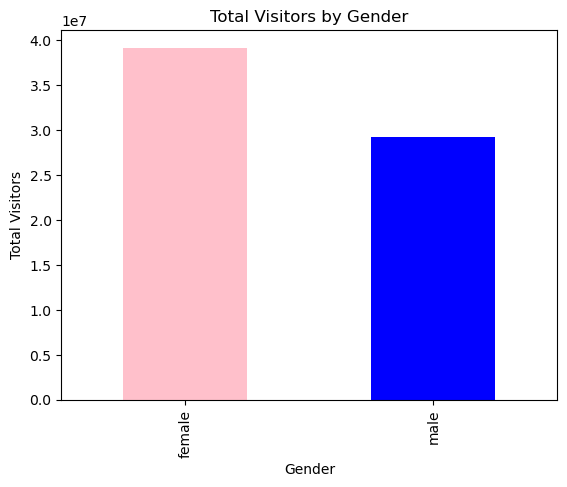

In [28]:
total_visitors_by_gender = korea_gender.groupby('Gender')['Visitors'].sum()
# Create a bar plot
total_visitors_by_gender.plot(kind='bar', color=['pink', 'blue'])

# Add title and labels
plt.title('Total Visitors by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Visitors')

# Show the plot
plt.show()

## Exhibit 2: Total Visitors by Gender across Dates
Graph of total visitors from every country, for any purpose(business/ tourism/ international relations, immigration, etc)

Date: 2016-2023

Datasets cover 53 countries. 

Intention: in future submissions we plan to highlight which exact countries these visitors are from. We want to identify if it's 100% that women have a higher tendency to visit South Korea and identify what the biggest motiavtor behind that would be. Our current hypothesis is that it K-pop would be the biggest driving force behind Korea's tourism industry. One pitfall is that we don't have YouTube viewing data on China as a whole while our datasets show we're getting the most visitors from China. This limits us from performing an in-depth analysis on YouTube viewing habits and the correlation of K-pop-motivated tourism efforts.

Axes(0.125,0.11;0.775x0.77)


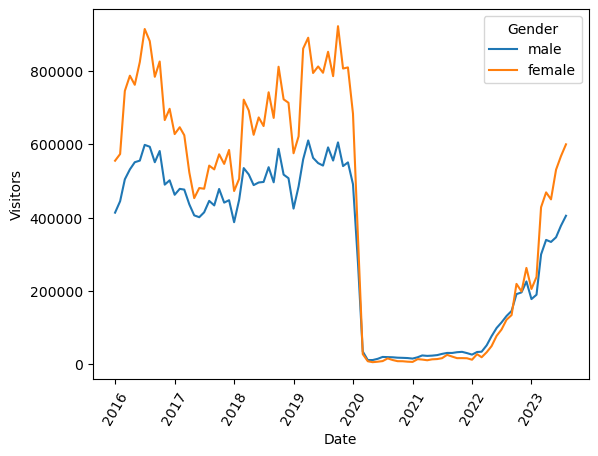

In [29]:
total_visitors_by_gender = duckdb.sql("SELECT Date, Gender, \
SUM(Visitors) as Visitors FROM korea_gender GROUP BY Date, Gender").df()
total_visitors_by_gender = sns.lineplot( data=total_visitors_by_gender, \
                                        x="Date", y="Visitors", hue="Gender")
plt.xticks(rotation=60)
print(total_visitors_by_gender)


In [30]:
korea_purpose.head()

,Date,Continents,Country,Purpose,Visitors,Visitors Same Period Previous Year,Growth
12,2016-01-01,Asia,China,tourism,456636.0,327225.0,39.5
13,2016-01-01,Asia,China,commercial,3723.0,4310.0,-13.6
14,2016-01-01,Asia,China,Public,140.0,165.0,-15.2
15,2016-01-01,Asia,China,Study Abroad,4383.0,3778.0,16.0
16,2016-01-01,Asia,China,etc,57099.0,58867.0,-3.0


## Exhibit 3: Total Visitors by Country- Top 5

Graph of Korea's top 5 visitors

Date: 2016-2023

We have surprisingly observed that while Korean content consumption peaked during COVID, the # of visitors didn't surge as much after COVID ended. Another interesting observation is that Korea has had a gigantic influence on "Chinese" countries such as China, Hong Kong, and Taiwan. For phase 3, we plan to group the China-based countries together to open up 2 more spaces of other countries and analyze what non-Asian countries have been affected the most. 
- We also believe the USA contains too many ethnicities of people and feel limited that we can't perform an extra set of analyses to determine which ethnicity of Americans have been affected by K-pop so much to visit Korea.

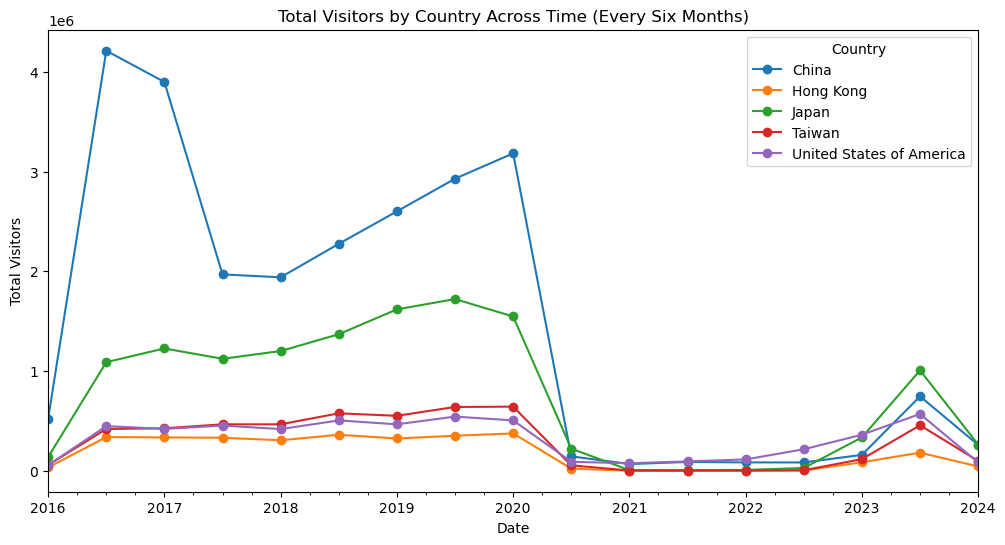

In [31]:
total_visitors_country = korea_purpose.groupby('Country')['Visitors'].sum()

# Select top 5 countries
top_5_countries = total_visitors_country.nlargest(5).index

# Filter the data for the top 5 countries
df_top_5 = korea_purpose[korea_purpose['Country'].isin(top_5_countries)]

# Group the data by 'Country' and 'Date' with six-month intervals and calculate the total visitors for each group
total_visitors_country_time = df_top_5.groupby(['\
Country', pd.Grouper(key='Date', freq='6M')])['Visitors'].sum().unstack(level=0)

# Plot the data
ax = total_visitors_country_time.plot(kind='line', marker='o', figsize=(12, 6))

# Add title and labels
plt.title('Total Visitors by Country Across Time (Every Six Months)')
plt.xlabel('Date')
plt.ylabel('Total Visitors')

# Show the plot
plt.show()

## Exhibit 3.5: Countries with the Highest Number of Visitors

In [32]:
# Read the world map data using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Merge the world map with your dataframes
merged_data = world.merge(korea_purpose, left_on='name', right_on='Country')

# Calculate the total visitors for each country
country_visitors = merged_data.groupby('name')['Visitors'].sum().reset_index()

# Merge the visitor data with the world map data
final_map_data = world.merge(country_visitors, left_on='name', right_on='name')

# Create a map
fig, ax = plt.subplots(1, 1)
final_map_data.plot(column='Visitors', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Countries with the Highest Number of Visitors')

# Show the plot
plt.show()

NameError: name 'gpd' is not defined

## Exhibit 4: Total Visitors by Country with a focus on Tourism 

In this graph, we have looked into what countries visit Korea the most with the intent to TOUR. Before this graph we were looking at total number of visitors for any purpose, including business/ international affairs/ immigration/ tourism.

It appears that Japan has suddenly come on top after COVID, ranking #1 for tourism. This opens up the window for us to investigate if Japan's k-pop consumption habits have risen simultaneously during this period, thus motivating Japanese nationals to visit South Korea. There are other factors to take into account here though, such as looking into whether China and Korea's relationship has worsened, thus restricting Chinese travel to South Korea. 

Date: 2016-2023


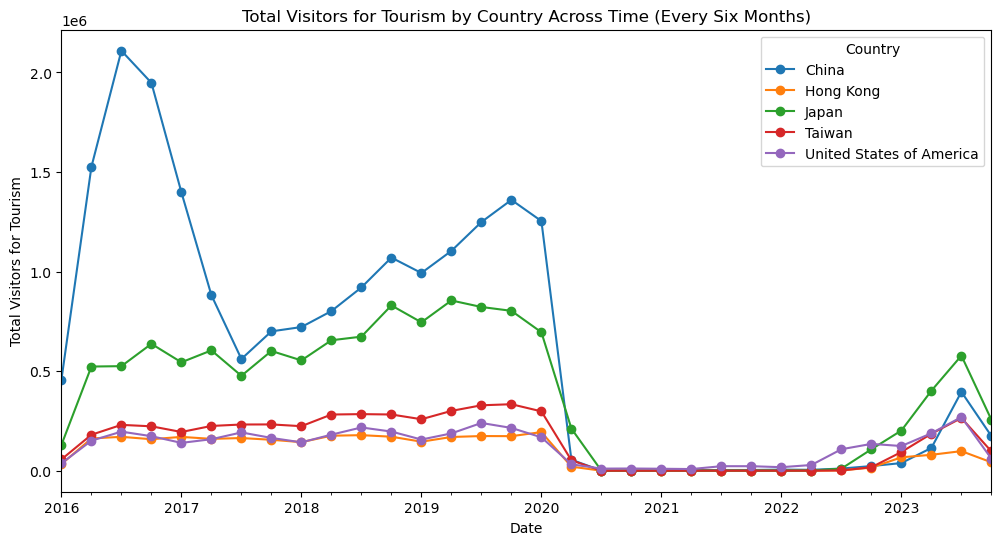

In [34]:
# Filter the data for the purpose of 'tourism'
korea_purpose_tourism = korea_purpose[korea_purpose['Purpose'] == 'tourism']

# Compute total visitors for each country with the purpose of tourism
total_visitors_country_tourism = korea_purpose_tourism.groupby('Country')['Visitors'].sum()

# Select top 5 countries
top_5_countries_tourism = total_visitors_country_tourism.nlargest(5).index

# Filter the data for the top 5 countries
korea_purpose_top_5_tourism = korea_purpose_tourism[korea_purpose_tourism['Country'].\
                                                    isin(top_5_countries_tourism)]

# Group the data by 'Country' and 'Date' with six-month intervals and calculate the total visitors for each group
total_visitors_country_time_tourism = korea_purpose_top_5_tourism.\
groupby(['Country', pd.Grouper(key='Date', freq='3M')])['Visitors'].sum().unstack(level=0)

# Plot the data
ax = total_visitors_country_time_tourism.plot(kind='line', marker='o', figsize=(12, 6))

# Add title and labels
plt.title('Total Visitors for Tourism by Country Across Time (Every Six Months)')
plt.xlabel('Date')
plt.ylabel('Total Visitors for Tourism')

# Show the plot
plt.show()

In [ ]:
merged_df = pd.merge(korea_purpose, korea_gender, on=['Date', 'Continents', 'Country'])


# Display the merged DataFrame
merged_df.head()

## Exhibit 5: Total Visitors for tourism by gender 

Added with the intent to discover the correlation between k-pop consumption, gender, and tourism. 

We plan to delete this dataset as we can't figure out why we're getting the same exact number of male and female visitors for each year.

## Q for TAs: Could you look into our code to pinpoint what is causing this error? We've even experimented with ChatGPT and still can't figure it out. Thank you so very much!

Date: 2016-2023 

In [35]:
# Filter the data for the purpose of 'tourism'
merged_df_tourism = merged_df[merged_df['Purpose'] == 'tourism']

# Compute total visitors for tourism by gender and country
total_visitors_tourism_gender_country = merged_df_tourism.\
groupby(['Country', 'Gender'])['Visitors_x'].sum().unstack()

# Select top 5 countries based on total visitors for tourism
top_5_countries_tourism = total_visitors_tourism_gender_country.sum(axis=1).nlargest(5).index

# Filter the data for the top 5 countries
total_visitors_tourism_gender_country_top5 = total_visitors_tourism_gender_country.loc[top_5_countries_tourism]

# Plot the data
total_visitors_tourism_gender_country_top5.plot(kind='bar', figsize=(10, 6),color=['pink', 'blue'])
plt.title('Total Visitors for Tourism by Gender for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Visitors for Tourism')
plt.show()

NameError: name 'merged_df' is not defined

## Exhibit 6: Total Visitors by gender with an emphasis on dates

Added with the intent to discover at which point in time global visitation to Korea has spiked, and to see the correlation between the timing of these spikes and the rise of K-pop content consumption. 

Date: 2016-2023

An interesting observation is that during the COVID pandemic, the number of male visitors is significantly higher than female visitors. We are wondering if this is worth taking a look at. 

We plan to do this by:
- Determining the main "purpose of travel" these male visitors had for their trip to Korea
- Identifying whether their trips were primarily motavited by "tourism"(which may mean K-pop fandom activities) or "business/ international relations."

If they were mostly in Korea for tourism, it could suggest the male global fanbase for K-pop has been growing during COVID, or that men were more willing to actively travel to Korea during the pandemic. 

We could further investigate to see if there were any K-pop events or marketing campaigns released at that time that specifically targeted male audiences, leading to this spike in male visitors.

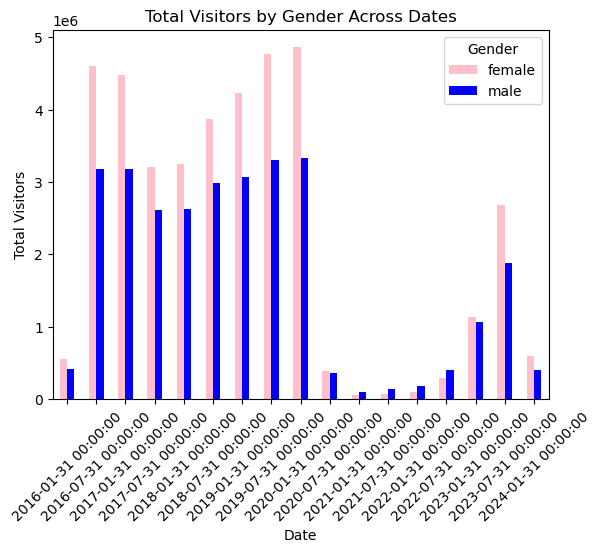

In [36]:
# Group by 'Date' and 'Gender', and calculate the sum of 'Visitors'
total_visitors_date_gender = korea_gender.groupby(['Date', 'Gender'])['Visitors'].sum().unstack()

# Resample the data to quarterly frequency
total_visitors_date_gender = total_visitors_date_gender.resample('6M').sum()

# Plot the data
total_visitors_date_gender.plot(kind='bar', color=['pink', 'blue'])

# Add title and labels
plt.title('Total Visitors by Gender Across Dates')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
# Show the plot
plt.show()

## Data limitations- any potential problems with these datasets (On Korean Tourism)

- Given that certain categories of data have been excluded during our cleanup process, there could be a sampling bias that omits certain traveler profiles or travel purposes. The generalizability of the dataset might be hindered.

- The specificity and granularity of "purpose of visit" could still bring up challenges. If travelers have multiple purposes (e.g., business and tourism), it might not be accurately reflected.

- Since we dumped the dataset into some kind of “google spreadsheets translate” software, cultural and linguistic nuances might be lost, which might impact the accuracy of categorical and textual data, especially regarding country names or purpose classifications.

- Gender is only identified as either male or female. Ensuring that gender classifications are accurate and respectful of visitor self-identification, and navigating potential cultural differences in gender classifications, could be important.


## Section 2: Datasets on YouTube Content Consumption with a focus on K-pop

This section focuses on how the consumption pattern of Korean content (especially K-pop) compares across different countries, particularly focusing on engagement metrics like likes, views, and comments. 

Our raw data can be found at https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset/data.

Here, we will select the relevant columns of the data, and add a column to represent the respective country. The resulting dataframe is returned.

In [ ]:
filelocation = "/Users/yamabazger/Documents/GitHub/info2950-repo/kpop_youtube_data/"
def add_column(abbrv, country):
    '''
    Param abbrv: string of the file's abbreviation
    Param country: string of the country's name
    '''
    df = pd.read_csv(filelocation+abbrv+'_youtube_trending_data.csv') 
    country_df = duckdb.sql("SELECT publishedAt, \
                       trending_date, tags, view_count, likes, \
                       comment_count \
                       FROM df \
                       WHERE CONTAINS(tags, 'k-pop')").df()
    country_df.insert(0, 'country', country) 
    return country_df

## Why was this dataset created?

The dataset was created to organize the top trending videos on Youtube each day, as an updated version of the Youtube Trending Video Statistics and Comments dataset. It is a daily record of the top trending videos, which Youtube identifies through a combination of factors including a measure of user interactions (e.g. likes, views, comments).


## Who funded the creation of this dataset?

This dataset is public domain and is publicly funded, with 54 total unique contributors. It was created using https://youtube.com’s API.


## What processes might have influenced what data was observed and recorded and what was not?

Culturally, highly anticipated videos like music releases will draw in more interaction like views and likes. Specifically in the kpop community, there is often a goal to surpass previously trending videos and have the highest possible view count for a new music video. So, we believe there will be observed and recorded increases within the first few days of publishing followed by a declining pattern. Since this dataset was created from the measurable information of a public domain, the way it’s recorded is unlikely to be subjective, however there may be a difference in terms of a cutoff in the number of trending videos.

We combined the abbreviated columns as well as the columns with the full country name to make processing easier.

In [ ]:
brazil_df = add_column('BR', 'Brazil')
brazil_df

In [ ]:
canada_df = add_column('CA', 'Canada')
canada_df

In [ ]:
denmark_df = add_column('DE', 'Denmark')
denmark_df

In [ ]:
france_df = add_column('FR', 'France')
france_df

In [ ]:
india_df = add_column('IN', 'India')
india_df

In [ ]:
japan_df = add_column('JP', 'Japan')
japan_df

In [ ]:
mexico_df = add_column('MX', 'Mexico')
mexico_df

In [ ]:
russia_df = add_column('RU', 'Russia')
russia_df

In [ ]:
united_states_df = add_column('US', 'US')
united_states_df

In [ ]:
united_kingdom_df = add_column('GB', 'UK')
united_kingdom_df

Once all individual country columns are combined, we will make another combined dataframe of all of the given countries.

In [ ]:
combined_df = duckdb.sql("SELECT * FROM brazil_df \
                            UNION ALL \
                            SELECT * FROM canada_df \
                            UNION ALL \
                            SELECT * FROM denmark_df \
                            UNION ALL \
                            SELECT * FROM france_df \
                            UNION ALL \
                            SELECT * FROM united_kingdom_df \
                            UNION ALL \
                            SELECT * FROM india_df \
                            UNION ALL \
                            SELECT * FROM japan_df \
                            UNION ALL \
                            SELECT * FROM mexico_df \
                            UNION ALL \
                            SELECT * FROM russia_df \
                            UNION ALL \
                            SELECT * FROM united_states_df").df()
combined_df

## Observations (rows) and Attributes (columns)

**Attributes**:

- *country*: The name of the country in which the Youtube video was published.
- *publishedAt*: The date of when the Youtube video was published.
- *trending_date*: The date of when the Youtube video was observed as trending.
- *tags*: The specific descriptor tag or tags the Youtube video was published under.
- *view_count*: A measure of how many views the Youtube video amassed since being published.
- *likes*: A measure of how many likes the Youtube video amassed since being published.
- *comment_count*:  A measure of how many comments were linked to the Youtube video since being published

**Observations**:

Each row represents the information described in each column for a distinct Youtube video.

## What preprocessing was done?

- We removed the columns of video_id, channel_id, category_id as they were not readable identifiers.
- We then removed the columns: thumbnail_link, comments_diabled, ratings_disabled, and description because they all returned FALSE
- The dislikes column was removed because more recent videos were coming up as having no dislikes, but this may have been because YT changed their dislike model (previously you could see dislikes, but now only the number of likes can be seen). Instead, we used likes, views, and comments to gage video popularity.
- Lastly, we sorted the tags column by “k-pop” because entertainment companies were easier to objectively list in terms of popularity compared to k-beauty influencers.

## If people are involved, were they aware of the data collection and if so, what purpose do they expect the data to be used for?

While all of Youtube’s users might not have directly known they were involved in this data collection, their agreement to Youtube’s Terms and Conditions means they consented to their interactive information (i.e. likes, views, and comments) as well as their profile demographics (i.e. country of origin) being stored by Youtube and used in this dataset.

Next, we will then create multiple pie charts of the data which analyze each category per country.

In [ ]:
def create_piechart(df, column):
    '''
    Param df: Pandas dataframe
    Param column: String of the column in df to be analyzed

    '''
    grouped = combined_df.groupby('country')[column].sum()
    plt.pie(grouped,labels=grouped.index,autopct='%.2f%%')
    plt.show()

## Exhibit 1: Total view count per country
Added with the intent to discover which countries most heavily participated in the trending of certain Youtube videos in regards to views.

In [ ]:
create_piechart(combined_df, 'view_count')

## Exhibit 2: Total number of likes per country
Added with the intent to discover which countries participated in the interaction of "liking" the trending Youtube videos.

In [ ]:
create_piechart(combined_df, 'likes')

## Exhibit 3: Total comment count per country
Added with the intent to discover which countries most heavily participated in interacting with the trending Youtube videos by way of comment.

In [ ]:
create_piechart(combined_df, 'comment_count')

## Exhibit 4: Total view count over time
Added with the intent to discover patterns within the views of trending Youtube videos.

Date: 2020-2023

In [ ]:
combined_df['publishedAt'] = pd.to_datetime(combined_df['publishedAt'])
country_views = combined_df.groupby('country')['view_count'].sum().reset_index()
top_countries = country_views.nlargest(5, 'view_count')
selected_rows = combined_df[combined_df['country'].isin(top_countries['country'])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_rows, x='publishedAt',
             y='view_count', hue='country', palette='bright')

plt.xlabel('Time Published')
plt.ylabel('Views')
plt.title('Kpop Youtube Views Over Time for Top 5 Countries')
plt.xticks(rotation=45)
plt.legend(title='Country', loc='upper left')

plt.show()


## Exhibit 5: Total like count over time
Added with the intent to discover patterns within the number of likes of trending Youtube videos.

Date: 2020-2023

In [ ]:
combined_df['publishedAt'] = pd.to_datetime(combined_df['publishedAt'])
country_likes = combined_df.groupby('country')['likes'].sum().reset_index()
top_countries = country_likes.nlargest(5, 'likes')
selected_rows = combined_df[combined_df['country'].isin(top_countries['country'])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_rows, x='publishedAt',
             y='likes', hue='country', palette='bright')
plt.xlabel('Time Video Published')
plt.ylabel('Comments')
plt.title('Kpop Youtube Likes Over Time for Top 5 Countries')
plt.xticks(rotation=45)
plt.legend(title='Country', loc='upper left')
plt.show()


## Exhibit 6: Total comment count over time
Added with the intent to discover patterns within the number of comments of trending Youtube videos.

Date: 2020-2023

In [ ]:
combined_df['publishedAt'] = pd.to_datetime(combined_df['publishedAt'])
country_comments = combined_df.groupby('country')['comment_count'].sum().reset_index()
top_countries = country_comments.nlargest(5, 'comment_count')
selected_rows = combined_df[combined_df['country'].isin(top_countries['country'])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_rows, x='publishedAt',
             y='comment_count', hue='country', palette='bright')
plt.xlabel('Time Video Published')
plt.ylabel('Comments')
plt.title('Kpop Youtube Comments Over Time for Top 5 Countries')
plt.xticks(rotation=45)
plt.legend(title='Country', loc='upper left')
plt.show()




## Data limitations- any potential problems with these datasets (On Trending Youtube Videos)

- The dislikes feature and how it’s information was displayed was changed by Youtube in a fairly recent update, so the dataset contains inconsistent measurements in that aspect which can’t be compared fully. 
- The dataset also categorized the trending videos for certain countries (Brazil, Canada, Germany, France, United Kingdom, India, Japan, Korea, Mexico, Russia, and the United States), but doesn’t take into account all other countries with Youtube users, so the summarization of trending videos is incomplete. 
- And while the Youtube data Japan includes Japanese groups, depending on how they are marketed or if they fall under Korean entertainment companies might muddy the data. 
- The likes and comments for videos are relatively similar in the way they present themselves, but there’s a large spike in views and then a decline, which could indicate a change in the way Youtube displays or tracks views.
- There are "Bots" everywhere that have been bought to distort the views of k-pop videos. This might affect the genuity of the data.

## Questions for reviewers

- Are our research questions too expansive? How do you suggest we narrow it down?
- How might we visualize/ explore the impact of K-pop across multiple nations and ethnicities?
- Any other methods of data cleaning you suggest we implement other than what we’ve already done, to narrow down and refine the quality of our data?
- Is 2 datasets enough, or do you suggest we add more?
- Any other suggestions on what more we could explore with our current datasets? What findings can we extract? What more questions should we ask?